<a href="https://colab.research.google.com/github/kikimiya0606/2024-2-final-test/blob/main/%EC%A0%84%EB%B6%81%2C_%EC%A0%84%EB%82%A8%2C_%EA%B0%95%EC%9B%90%2C_%EC%B6%A9%EB%82%A8%2C_%EC%B6%A9%EB%B6%81%2C_%EC%9A%B8%EC%82%B0%2C_%EA%B4%91%EC%A3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
!pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 26.8 MB/s eta 0:00:00


In [3]:
%config InlineBackend.figure_format = 'retina'

In [5]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [8]:
df = pd.read_csv("/content/한국 지역별 1인가구수.csv", encoding="euc-kr")

In [9]:
gender_by_region = df.groupby("시도명")[["계", "남자", "여자"]].sum()
gender_by_region["남자비율"] = gender_by_region["남자"] / gender_by_region["계"]
gender_by_region["여자비율"] = gender_by_region["여자"] / gender_by_region["계"]
print(gender_by_region[["남자비율", "여자비율"]].round(3))

          남자비율   여자비율
시도명                  
강원특별자치도  0.517  0.483
경기도      0.547  0.453
경상남도     0.517  0.483
경상북도     0.518  0.482
광주광역시    0.502  0.498
대구광역시    0.475  0.525
대전광역시    0.513  0.487
부산광역시    0.468  0.532
서울특별시    0.476  0.524
세종특별자치시  0.524  0.476
울산광역시    0.568  0.432
인천광역시    0.528  0.472
전라남도     0.511  0.489
전북특별자치도  0.501  0.499
제주특별자치도  0.519  0.481
충청남도     0.552  0.448
충청북도     0.538  0.462


-> csv 파일에 있는 모든 지역의 1인 가구 성별 비율

남자는 울산광역시가 제일 많고 여자는 부산광역시가 제일 많다

In [16]:
print(gender_by_region.loc["전북특별자치도", ["남자비율", "여자비율"]].round(3))

남자비율    0.501
여자비율    0.499
Name: 전북특별자치도, dtype: float64


-> 전북특별자치도의 1인 가구 성별 비율

남자가 여자보다 0.002% 높다

In [17]:
print(gender_by_region.loc["전북특별자치도", ["계", "남자", "여자"]])

계     397691.0
남자    199110.0
여자    198581.0
Name: 전북특별자치도, dtype: float64


-> 전북특별자치도의 총 1인 가구 수 (총 수, 남자 수, 여자 수)

In [38]:
# 전북특별자치도 데이터만 필터링
jeonbook = df[df["시도명"] == "전북특별자치도"]

# 계 기준으로 내림차순 정렬하고 가장 많은 행 3개 출력
top_jeonbook = jeonbook.sort_values(by="계", ascending=False)[["시군구명", "읍면동명", "계"]].head(3)

print("✅ 전북특별자치도에서 1인 가구 수가 가장 많은 지역:")
print(top_jeonbook)

✅ 전북특별자치도에서 1인 가구 수가 가장 많은 지역:
         시군구명  읍면동명     계
3390  전주시 완산구  효자5동  9812
3396  전주시 덕진구   금암동  7625
3427      군산시   수송동  6842


-> 전북특별자치도에서 1인 가구 수가 가장 많은 지역 top 3

1위는 전주 완산구 효자5동 총 9812명

2위는 전주 덕진구 금암동 총 7625명

3위는 군산 수송동 총 6842명

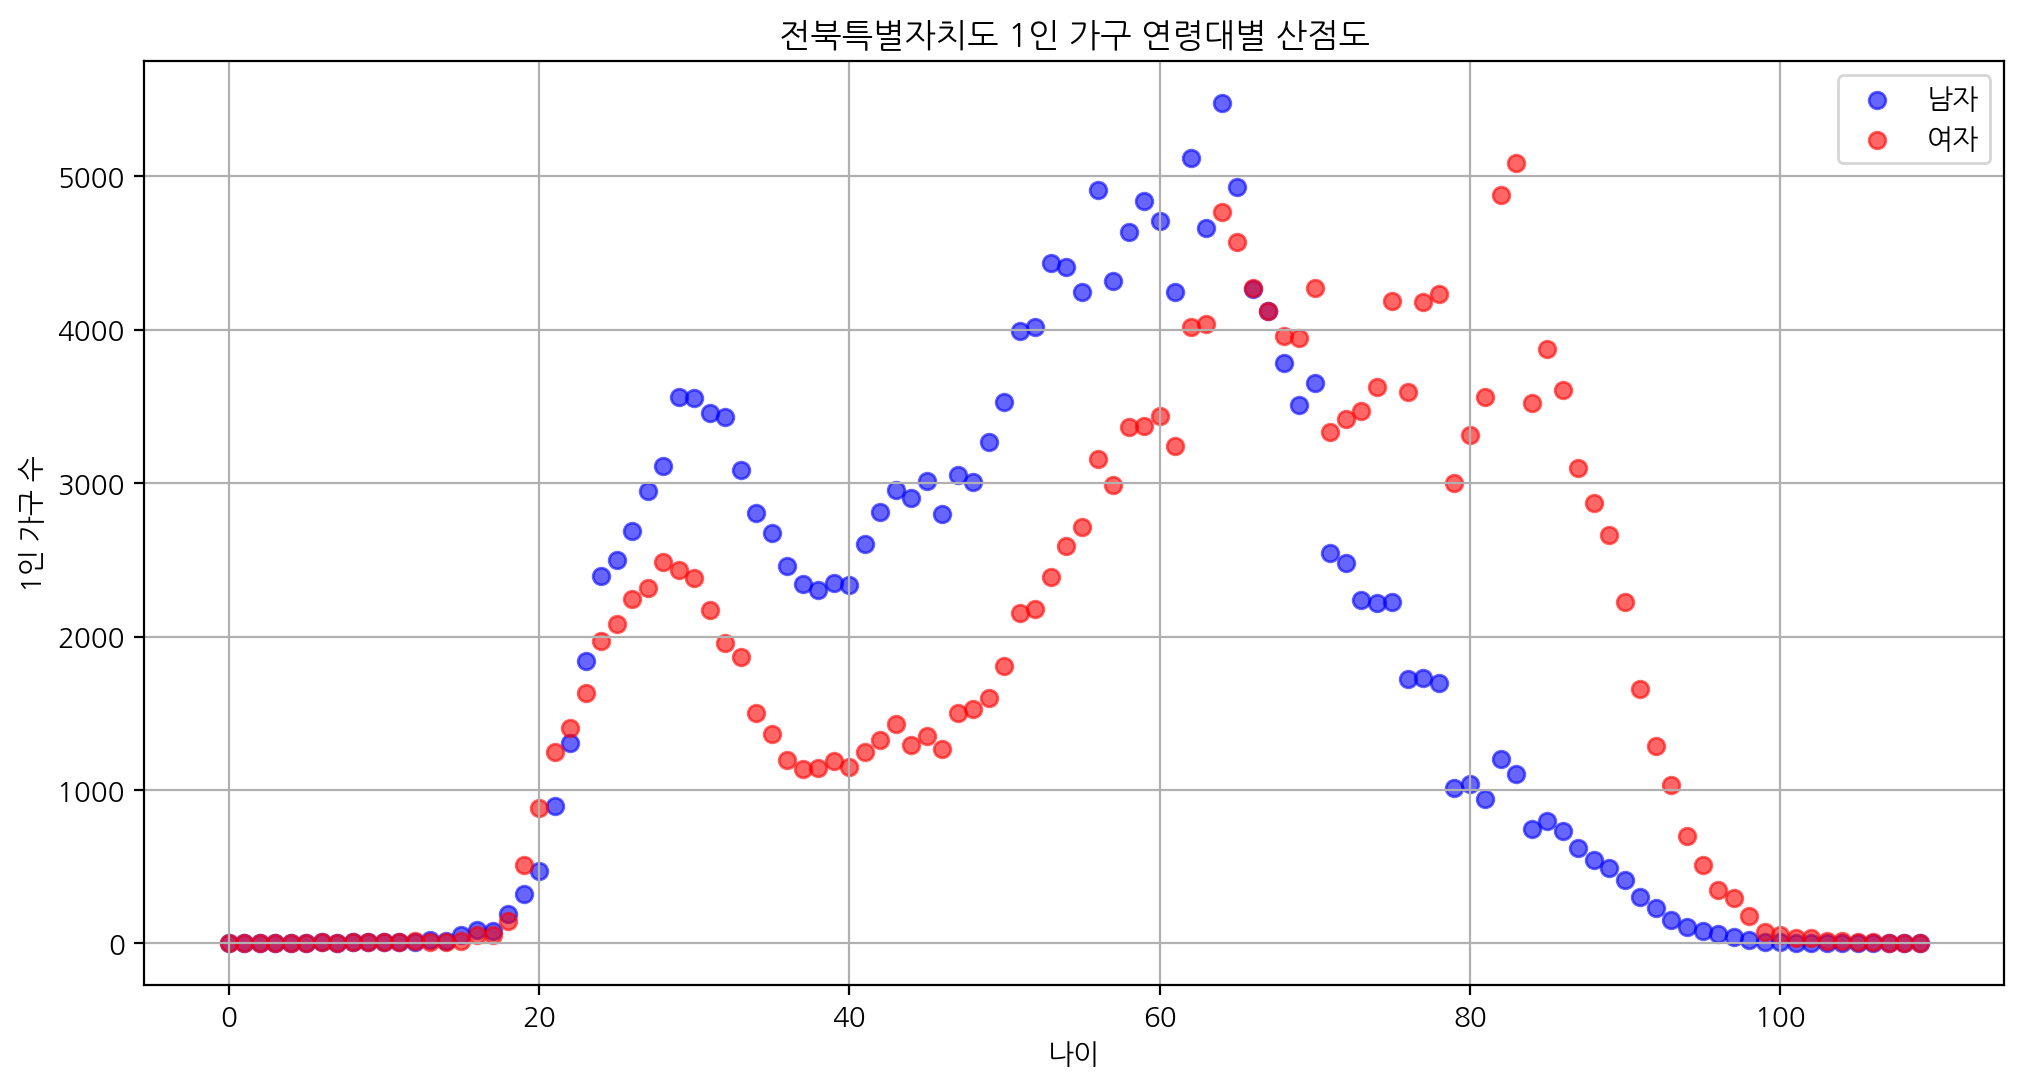

In [19]:
# 전북특별자치도 필터링
jeonbook = df[df["시도명"] == "전북특별자치도"]

# 연령 관련 열 분리
male_columns = [col for col in jeonbook.columns if "세" in col and "남자" in col]
female_columns = [col for col in jeonbook.columns if "세" in col and "여자" in col]

# 남자 데이터
male_ages = []
male_totals = []
for col in male_columns:
    try:
        age = int(col.replace("세남자", ""))
        total = jeonbook[col].sum()
        male_ages.append(age)
        male_totals.append(total)
    except:
        continue

# 여자 데이터
female_ages = []
female_totals = []
for col in female_columns:
    try:
        age = int(col.replace("세여자", ""))
        total = jeonbook[col].sum()
        female_ages.append(age)
        female_totals.append(total)
    except:
        continue

# 시각화
plt.figure(figsize=(12, 6))
plt.scatter(male_ages, male_totals, color='blue', alpha=0.6, label='남자')
plt.scatter(female_ages, female_totals, color='red', alpha=0.6, label='여자')
plt.title("전북특별자치도 1인 가구 연령대별 산점도")
plt.xlabel("나이")
plt.ylabel("1인 가구 수")
plt.legend()
plt.grid(True)
plt.show()

-> 전북특별자치도 1인 가구 연령대별 산점도

x축은 연령대, y축은 가구 수다

남자의 경우 60대 초반 1인 가구 수가 제일 높았고 여자의 경우 80대 초반 1인 가구 수가 제일 높다

In [40]:
print(gender_by_region.loc["전라남도", ["남자비율", "여자비율"]].round(3))

남자비율    0.511
여자비율    0.489
Name: 전라남도, dtype: float64


-> 전라남도의 1인 가구 성별 비율

남자의 비율이 여자보다 0.022% 높다

In [11]:
print(gender_by_region.loc["전라남도", ["계", "남자", "여자"]])

계     435051.0
남자    222281.0
여자    212770.0
Name: 전라남도, dtype: float64


-> 전라남도의 총 1인 가구 수 (총 수, 남자 수, 여자 수)

In [41]:
# 전라남도 데이터만 필터링
jeonnam = df[df["시도명"] == "전라남도"]

# 계 기준으로 내림차순 정렬하고 가장 많은 행 3개 출력
top_jeonnam = jeonnam.sort_values(by="계", ascending=False)[["시군구명", "읍면동명", "계"]].head(3)

print("✅ 전라남도에서 1인 가구 수가 가장 많은 지역:")
print(top_jeonnam)

✅ 전라남도에서 1인 가구 수가 가장 많은 지역:
     시군구명 읍면동명     계
2266  광양시  광양읍  9858
2274  광양시  중마동  9601
2340  화순군  화순읍  7700


-> 전라남도에서 1인 가구 수가 가장 많은 지역 top 3

1위는 광양 광양읍 총 9858명

2위는 광양 중마동 총 9601명

3위는 화순 화순읍 총 7700명

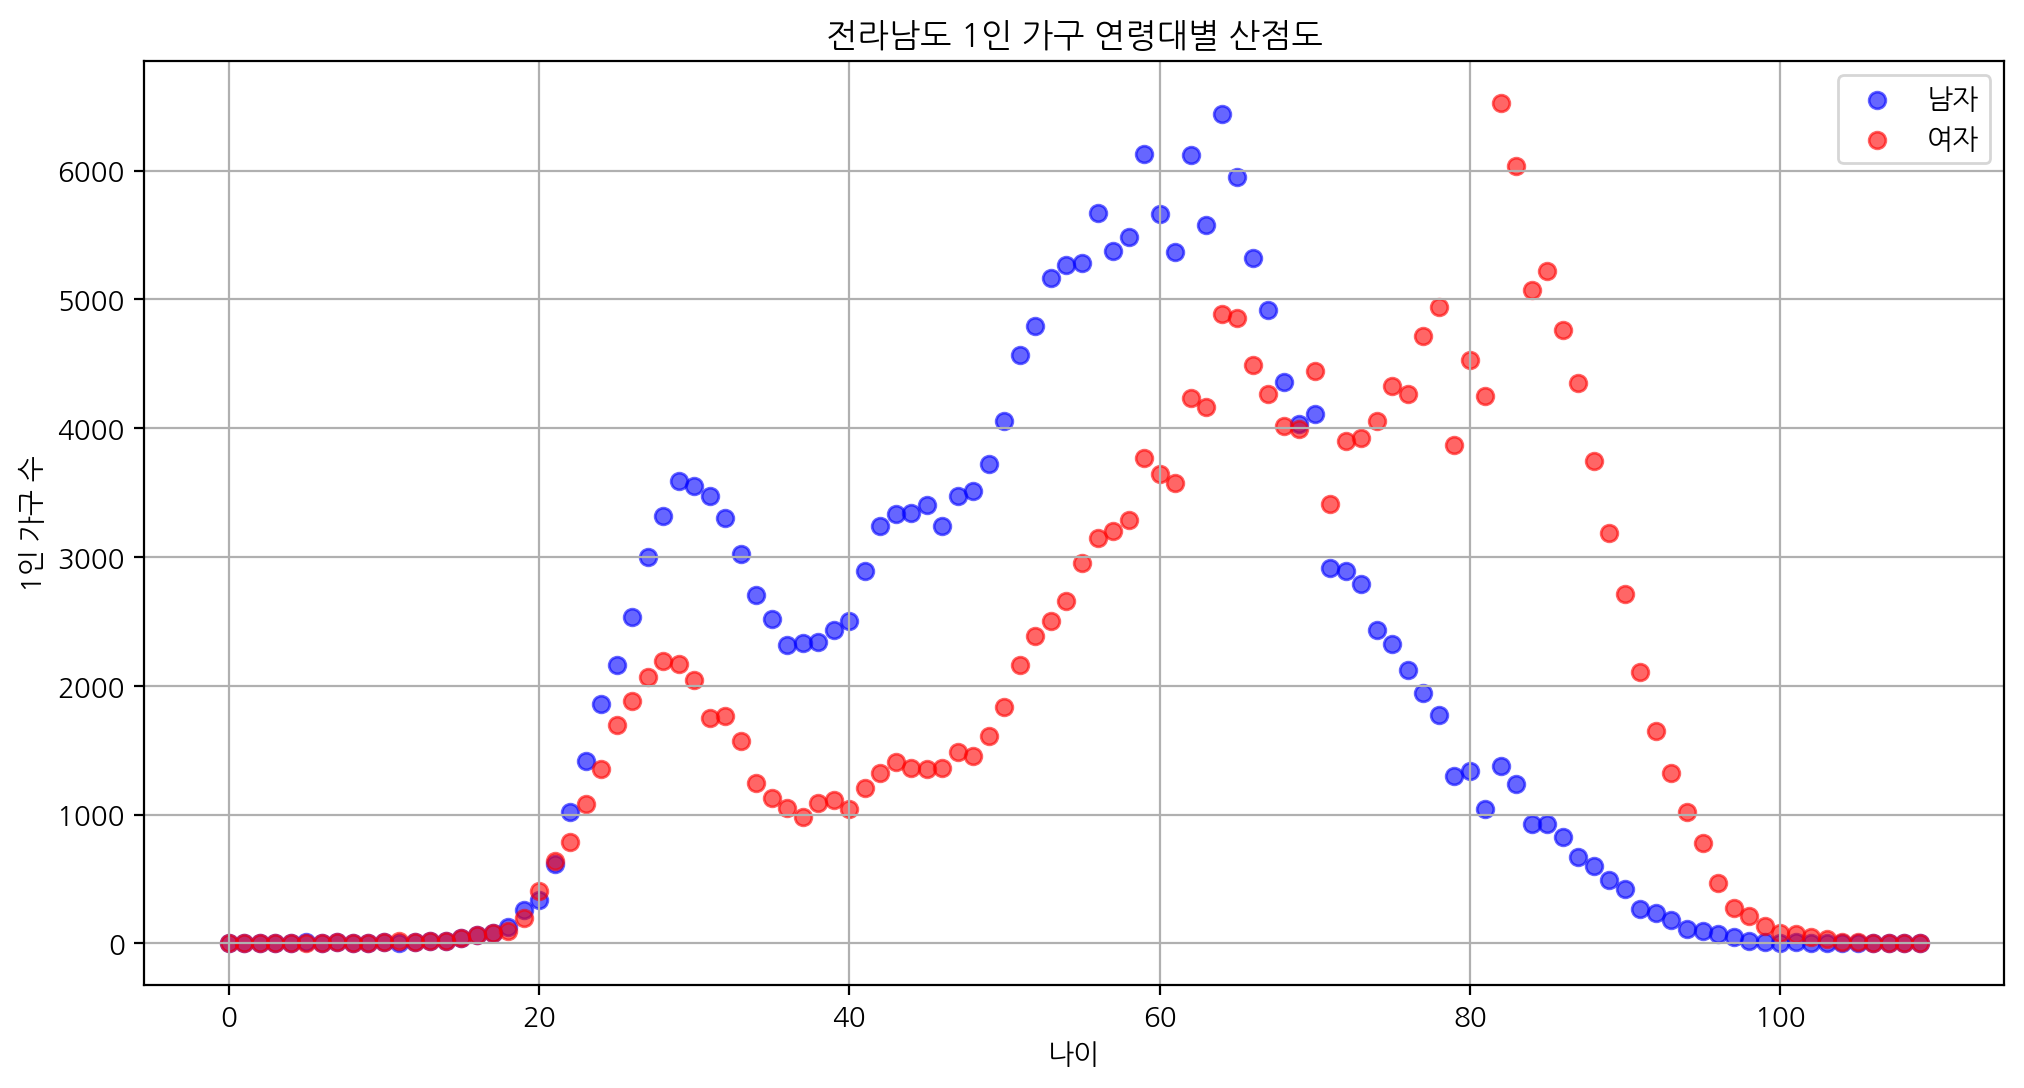

In [15]:
# 전라남도 필터링
jeonnam = df[df["시도명"] == "전라남도"]

# 연령 관련 열 분리
male_columns = [col for col in jeonnam.columns if "세" in col and "남자" in col]
female_columns = [col for col in jeonnam.columns if "세" in col and "여자" in col]

# 남자 데이터
male_ages = []
male_totals = []
for col in male_columns:
    try:
        age = int(col.replace("세남자", ""))
        total = jeonnam[col].sum()
        male_ages.append(age)
        male_totals.append(total)
    except:
        continue

# 여자 데이터
female_ages = []
female_totals = []
for col in female_columns:
    try:
        age = int(col.replace("세여자", ""))
        total = jeonnam[col].sum()
        female_ages.append(age)
        female_totals.append(total)
    except:
        continue

# 시각화
plt.figure(figsize=(12, 6))
plt.scatter(male_ages, male_totals, color='blue', alpha=0.6, label='남자')
plt.scatter(female_ages, female_totals, color='red', alpha=0.6, label='여자')
plt.title("전라남도 1인 가구 연령대별 산점도")
plt.xlabel("나이")
plt.ylabel("1인 가구 수")
plt.legend()
plt.grid(True)
plt.show()


-> 전라남도 1인 가구 연령대별 산점도

x축은 연령대, y축은 가구 수

남자의 경우 60대 초반 1인 가구 수가 제일 높았고 여자의 경우 80대 초반 1인 가구 수가 제일 높다

공통적으로 20대 초반, 80대 후반이 1인 가구 수 비율이 적다

In [42]:
print(gender_by_region.loc["강원특별자치도", ["남자비율", "여자비율"]].round(3))

남자비율    0.517
여자비율    0.483
Name: 강원특별자치도, dtype: float64


-> 강원특별자치도의 1인 가구 성별 비율

남자가 여자보다 0.034% 비율이 높다

In [21]:
print(gender_by_region.loc["강원특별자치도", ["계", "남자", "여자"]])

계     351761.0
남자    181761.0
여자    170000.0
Name: 강원특별자치도, dtype: float64


-> 강원특별자치도의 총 1인 가구 수 (총 수, 남자 수, 여자 수)

In [44]:
# 강원특별자치도 데이터만 필터링
gangwon = df[df["시도명"] == "강원특별자치도"]

# 계 기준으로 내림차순 정렬하고 가장 많은 행 3개 출력
top_gangwon = gangwon.sort_values(by="계", ascending=False)[["시군구명", "읍면동명", "계"]].head(3)

print("✅ 강원특별자치도에서 1인 가구 수가 가장 많은 지역:")
print(top_gangwon)

✅ 강원특별자치도에서 1인 가구 수가 가장 많은 지역:
     시군구명   읍면동명     계
3217  원주시    단구동  8223
3227  원주시  반곡관설동  7841
3288  홍천군    홍천읍  6781


강원특별자치도에서 1인 가구 수가 가장 많은 지역 top 3


1위는 원주 단구동 총 8223명

2위는 원주 반곡관설동 총 7841명

3위는 홍천 홍천읍 총 6781명

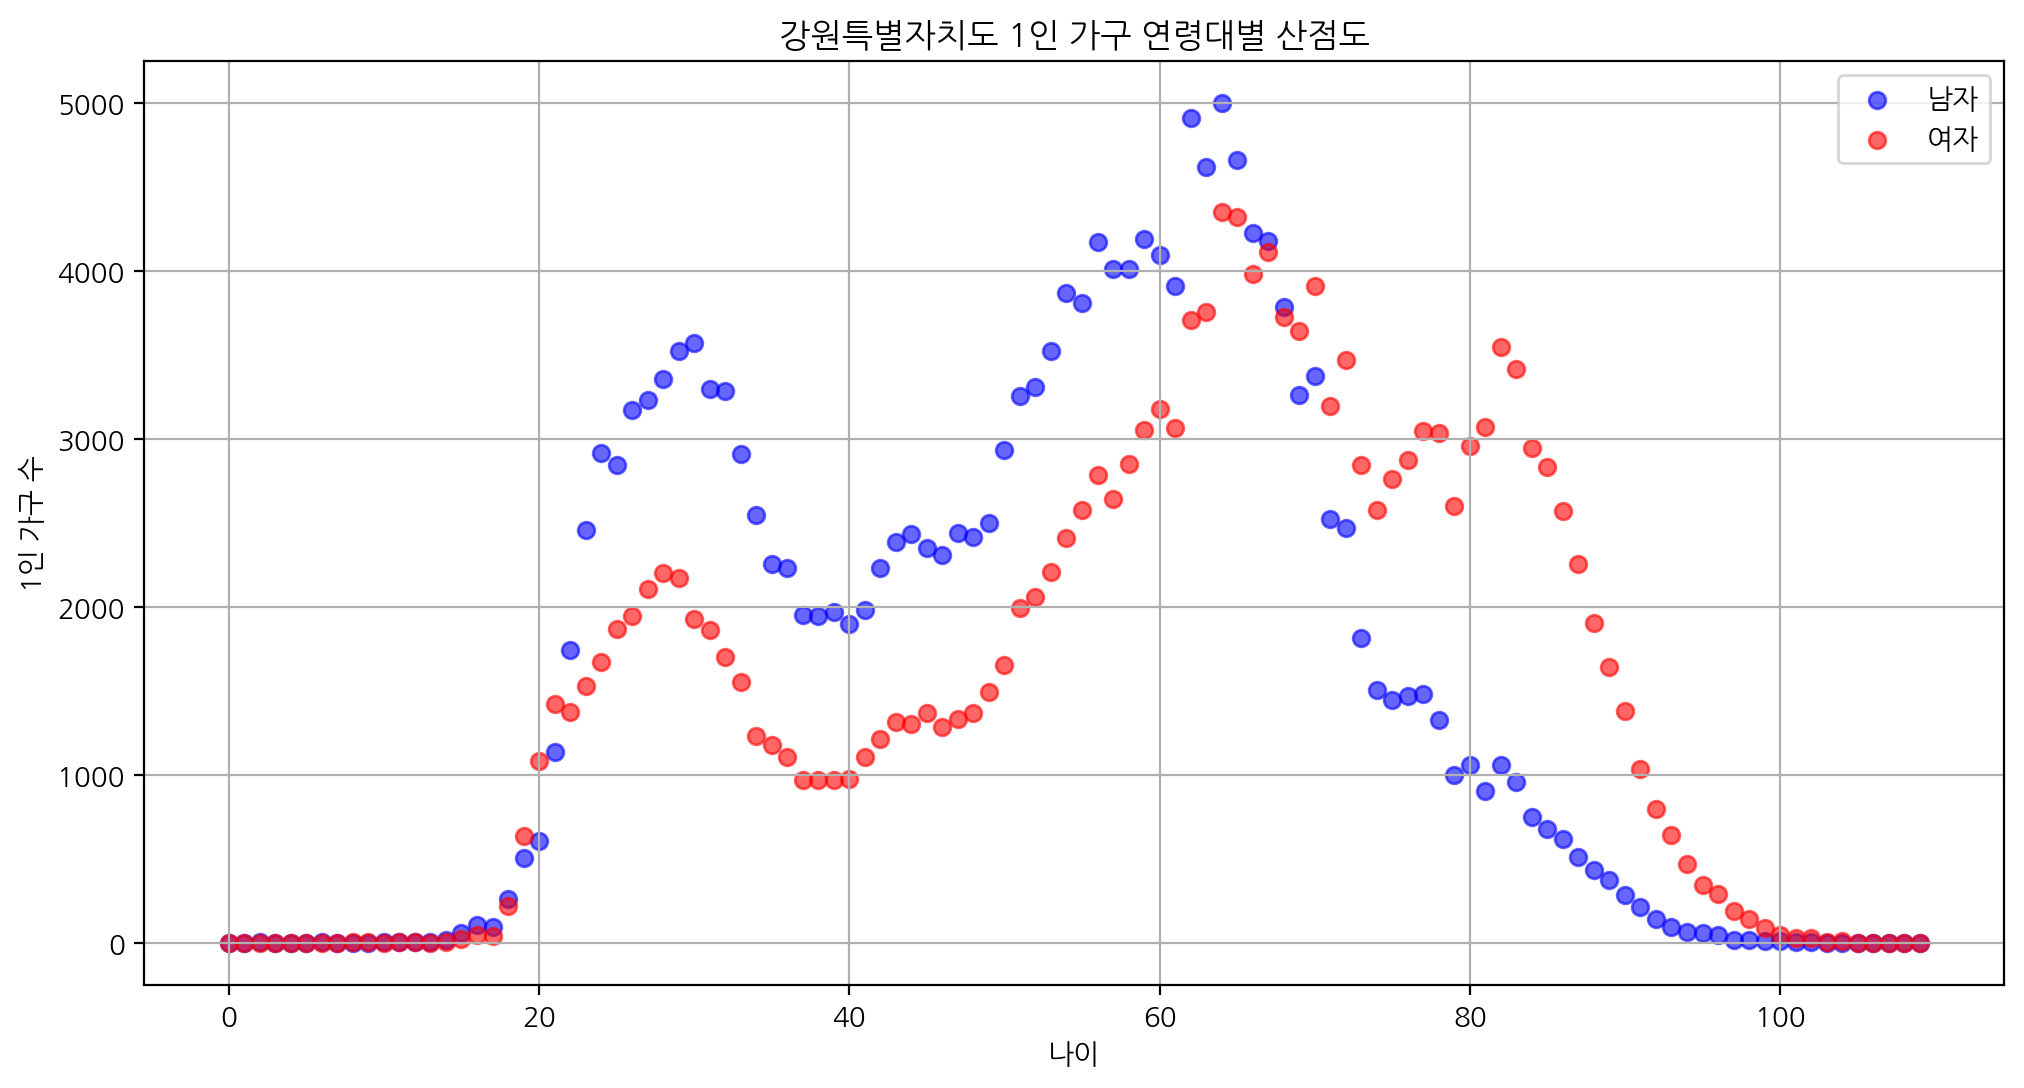

In [23]:
# 강원특별자치도 필터링
gangwon = df[df["시도명"] == "강원특별자치도"]

# 연령 관련 열 분리
male_columns = [col for col in gangwon.columns if "세" in col and "남자" in col]
female_columns = [col for col in gangwon.columns if "세" in col and "여자" in col]

# 남자 데이터
male_ages = []
male_totals = []
for col in male_columns:
    try:
        age = int(col.replace("세남자", ""))
        total = gangwon[col].sum()
        male_ages.append(age)
        male_totals.append(total)
    except:
        continue

# 여자 데이터
female_ages = []
female_totals = []
for col in female_columns:
    try:
        age = int(col.replace("세여자", ""))
        total = gangwon[col].sum()
        female_ages.append(age)
        female_totals.append(total)
    except:
        continue

# 시각화
plt.figure(figsize=(12, 6))
plt.scatter(male_ages, male_totals, color='blue', alpha=0.6, label='남자')
plt.scatter(female_ages, female_totals, color='red', alpha=0.6, label='여자')
plt.title("강원특별자치도 1인 가구 연령대별 산점도")
plt.xlabel("나이")
plt.ylabel("1인 가구 수")
plt.legend()
plt.grid(True)
plt.show()


-> 강원특별자치도 1인 가구 연령대별 산점도

x축은 연령대, y축은 가구 수다

남자, 여자 공통적으로 60대 초반 1인 가구 수가 제일 많다

In [24]:
print(gender_by_region.loc["충청북도", ["남자비율", "여자비율"]].round(3))

남자비율    0.538
여자비율    0.462
Name: 충청북도, dtype: float64


-> 충청북도의 1인 가구 성별 비율

남자가 여자보다 0.076% 비율이 높다

In [25]:
print(gender_by_region.loc["충청북도", ["계", "남자", "여자"]])

계     359842.0
남자    193764.0
여자    166078.0
Name: 충청북도, dtype: float64


-> 충청북도의 총 1인 가구 수 (총 수, 남자 수, 여자 수)

In [45]:
# 충청북도 데이터만 필터링
chungbuk = df[df["시도명"] == "충청북도"]

# 계 기준으로 내림차순 정렬하고 가장 많은 행 3개 출력
top_chungbuk = chungbuk.sort_values(by="계", ascending=False)[["시군구명", "읍면동명", "계"]].head(3)

print("✅ 충청북도에서 1인 가구 수가 가장 많은 지역:")
print(top_chungbuk)

✅ 충청북도에서 1인 가구 수가 가장 많은 지역:
         시군구명  읍면동명      계
1840  청주시 청원구   오창읍  12873
1828  청주시 흥덕구   오송읍  10543
1815  청주시 상당구  용암1동   9611


충청북도에서 1인 가구 수가 가장 많은 지역 top 3


1위는 청주 청원구 오창읍 총 12873명

2위는 청주 흥덕구 오송읍 총 10543명

3위는 청주 상당구 용암1동 총 9611명

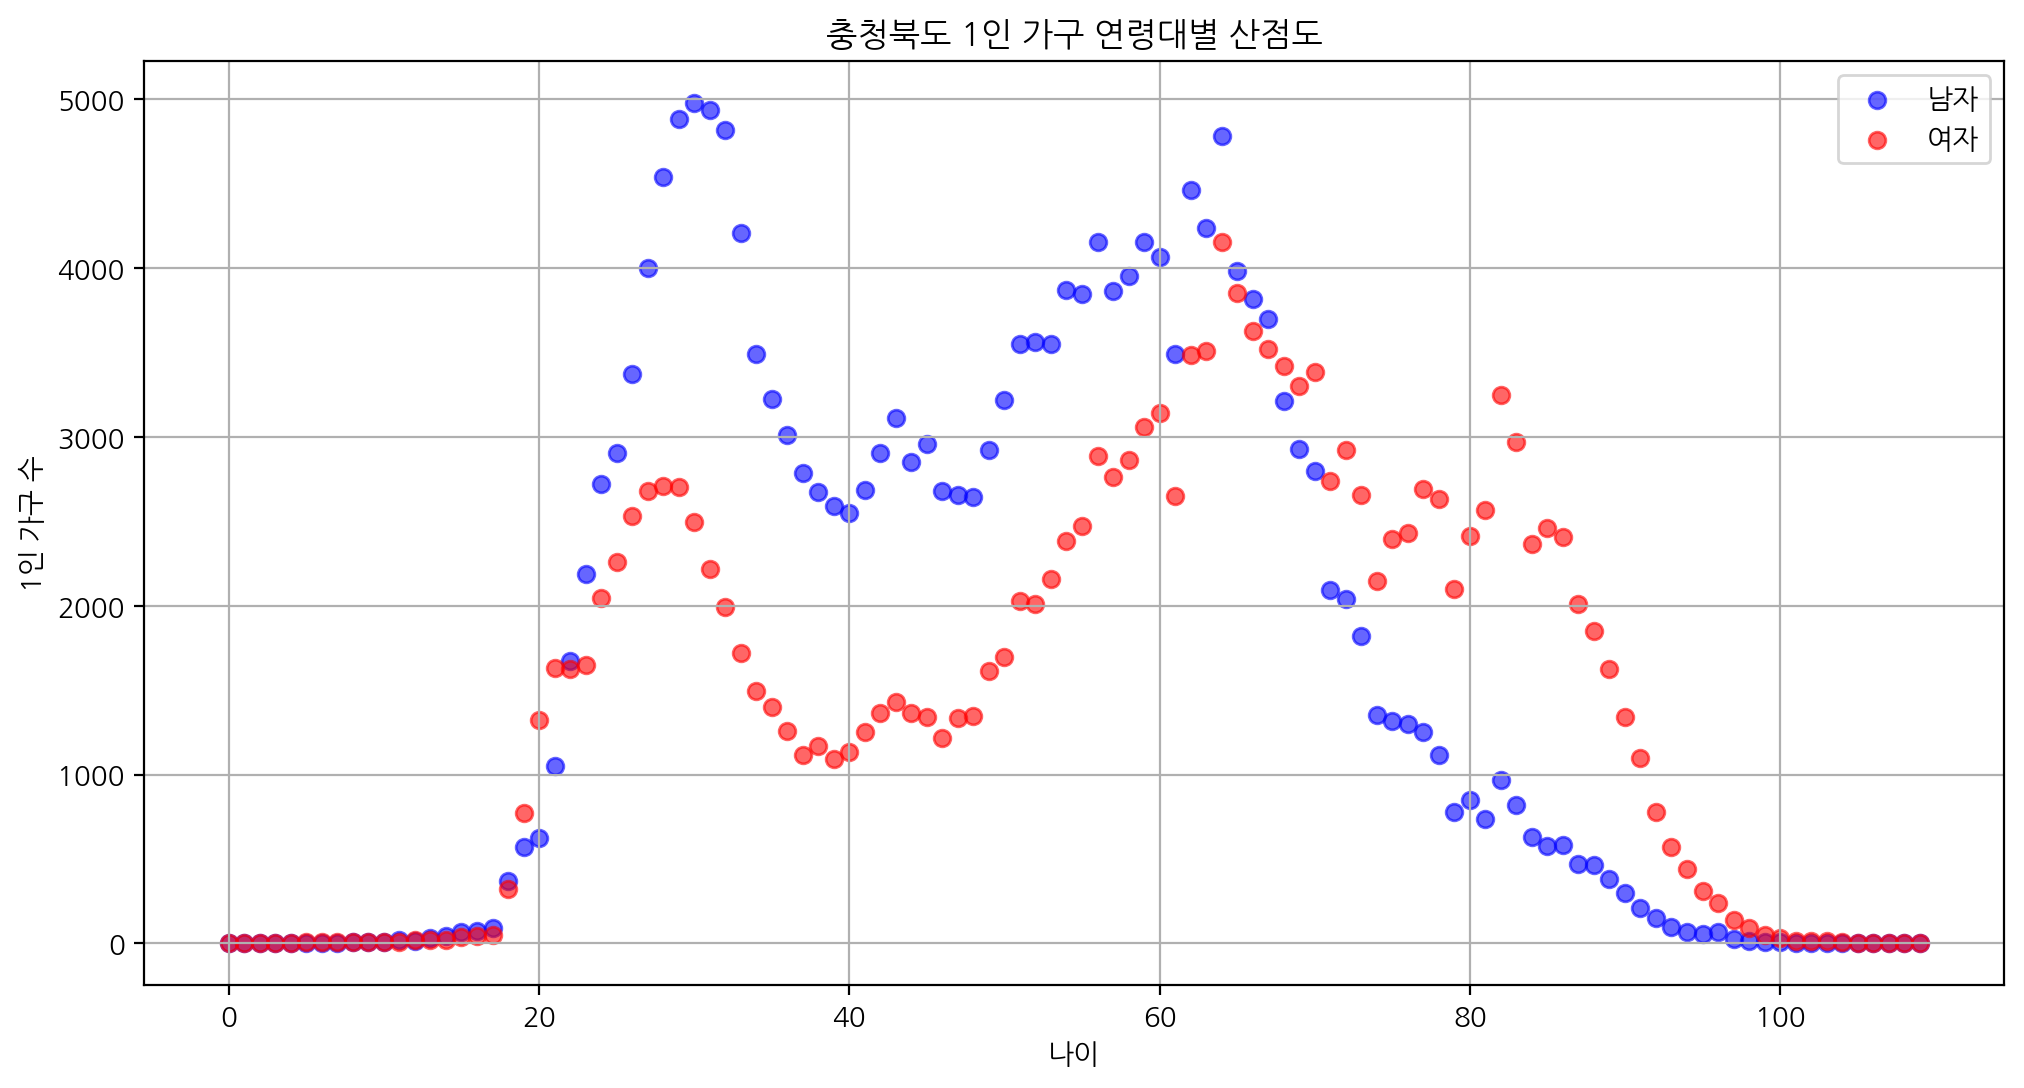

In [27]:
# 충청북도 필터링
chungbuk = df[df["시도명"] == "충청북도"]

# 연령 관련 열 분리
male_columns = [col for col in chungbuk.columns if "세" in col and "남자" in col]
female_columns = [col for col in chungbuk.columns if "세" in col and "여자" in col]

# 남자 데이터
male_ages = []
male_totals = []
for col in male_columns:
    try:
        age = int(col.replace("세남자", ""))
        total = chungbuk[col].sum()
        male_ages.append(age)
        male_totals.append(total)
    except:
        continue

# 여자 데이터
female_ages = []
female_totals = []
for col in female_columns:
    try:
        age = int(col.replace("세여자", ""))
        total = chungbuk[col].sum()
        female_ages.append(age)
        female_totals.append(total)
    except:
        continue

# 시각화
plt.figure(figsize=(12, 6))
plt.scatter(male_ages, male_totals, color='blue', alpha=0.6, label='남자')
plt.scatter(female_ages, female_totals, color='red', alpha=0.6, label='여자')
plt.title("충청북도 1인 가구 연령대별 산점도")
plt.xlabel("나이")
plt.ylabel("1인 가구 수")
plt.legend()
plt.grid(True)
plt.show()


-> 충청북도 1인 가구 연령대별 산점도

x축은 연령대, y축은 가구 수다

남자의 경우 30대 1인 가구 수가 제일 높았고 여자의 경우 60대 초반 1인 가구 수가 제일 높다

In [29]:
print(gender_by_region.loc["충청남도", ["남자비율", "여자비율"]].round(3))

남자비율    0.552
여자비율    0.448
Name: 충청남도, dtype: float64


-> 충청남도의 1인 가구 성별 비율

남자가 여자보다 0.104% 더 높다

In [30]:
print(gender_by_region.loc["충청남도", ["계", "남자", "여자"]])

계     479804.0
남자    264682.0
여자    215122.0
Name: 충청남도, dtype: float64


-> 충청남도의 총 1인 가구 수 (총 수, 남자 수, 여자 수)

In [46]:
# 충청남도 데이터만 필터링
chungnam = df[df["시도명"] == "충청남도"]

# 계 기준으로 내림차순 정렬하고 가장 많은 행 3개 출력
top_chungnam = chungnam.sort_values(by="계", ascending=False)[["시군구명", "읍면동명", "계"]].head(3)

print("✅ 충청남도에서 1인 가구 수가 가장 많은 지역:")
print(top_chungnam)

✅ 충청남도에서 1인 가구 수가 가장 많은 지역:
         시군구명  읍면동명      계
2023      아산시   배방읍  19022
1986  천안시 서북구  부성1동  14326
1979  천안시 서북구  성정2동  13196


충청남도에서 1인 가구 수가 가장 많은 지역 top 3


1위는 아산시 배방읍 총 19022명

2위는 천안 서북구 부성1동 총 14326명

3위는 천안 서북구 성정2동 총 13196명

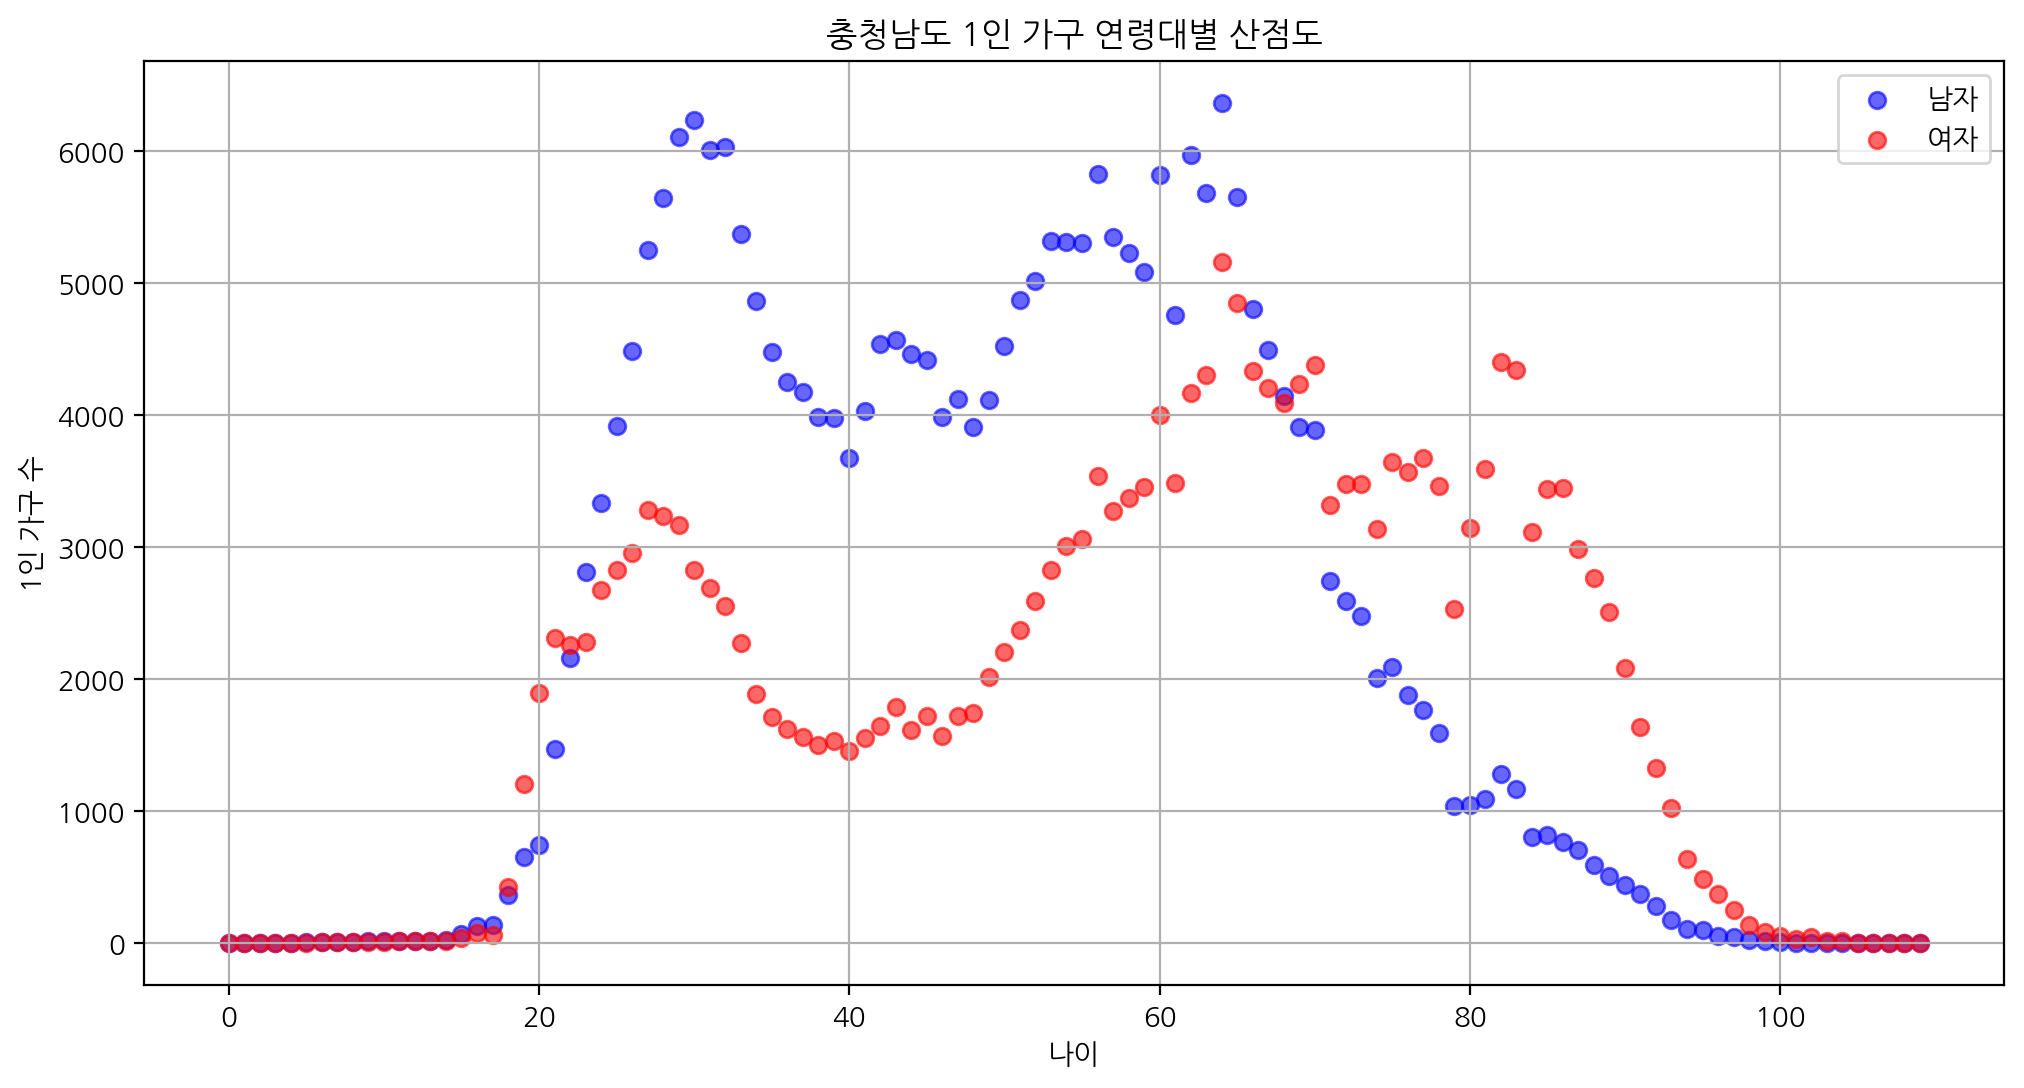

In [32]:
# 충청남도 필터링
chungnam = df[df["시도명"] == "충청남도"]

# 연령 관련 열 분리
male_columns = [col for col in chungnam.columns if "세" in col and "남자" in col]
female_columns = [col for col in chungnam.columns if "세" in col and "여자" in col]

# 남자 데이터
male_ages = []
male_totals = []
for col in male_columns:
    try:
        age = int(col.replace("세남자", ""))
        total = chungnam[col].sum()
        male_ages.append(age)
        male_totals.append(total)
    except:
        continue

# 여자 데이터
female_ages = []
female_totals = []
for col in female_columns:
    try:
        age = int(col.replace("세여자", ""))
        total = chungnam[col].sum()
        female_ages.append(age)
        female_totals.append(total)
    except:
        continue

# 시각화
plt.figure(figsize=(12, 6))
plt.scatter(male_ages, male_totals, color='blue', alpha=0.6, label='남자')
plt.scatter(female_ages, female_totals, color='red', alpha=0.6, label='여자')
plt.title("충청남도 1인 가구 연령대별 산점도")
plt.xlabel("나이")
plt.ylabel("1인 가구 수")
plt.legend()
plt.grid(True)
plt.show()

-> 충청남도 1인 가구 연령대별 산점도

x축은 연령대, y축은 가구 수다

남자와 여자 동일하게 60대 초반 1인 가구 수가 제일 많다

In [33]:
print(gender_by_region.loc["울산광역시", ["남자비율", "여자비율"]].round(3))

남자비율    0.568
여자비율    0.432
Name: 울산광역시, dtype: float64


-> 울산광역시의 1인 가구 성별 비율

남자가 여자보다 0.136% 더 높다

In [34]:
print(gender_by_region.loc["울산광역시", ["계", "남자", "여자"]])

계     186506.0
남자    105999.0
여자     80507.0
Name: 울산광역시, dtype: float64


-> 울산광역시의 총 1인 가구 수 (총 수, 남자 수, 여자 수)

In [47]:
# 울산광역시 데이터만 필터링
ulsan = df[df["시도명"] == "울산광역시"]

# 계 기준으로 내림차순 정렬하고 가장 많은 행 3개 출력
top_ulsan = ulsan.sort_values(by="계", ascending=False)[["시군구명", "읍면동명", "계"]].head(3)

print("✅ 울산광역시에서 1인 가구 수가 가장 많은 지역:")
print(top_ulsan)

✅ 울산광역시에서 1인 가구 수가 가장 많은 지역:
     시군구명 읍면동명      계
1140   남구  삼산동  12094
1148   동구  방어동   7687
1139   남구   달동   7134


-> 울산광역시에서 1인 가구 수가 가장 많은 지역 top 3


1위는 남구 삼산동 총 12094명

2위는 동구 방어동 총 7687명

3위는 남구 달동 총 7134명

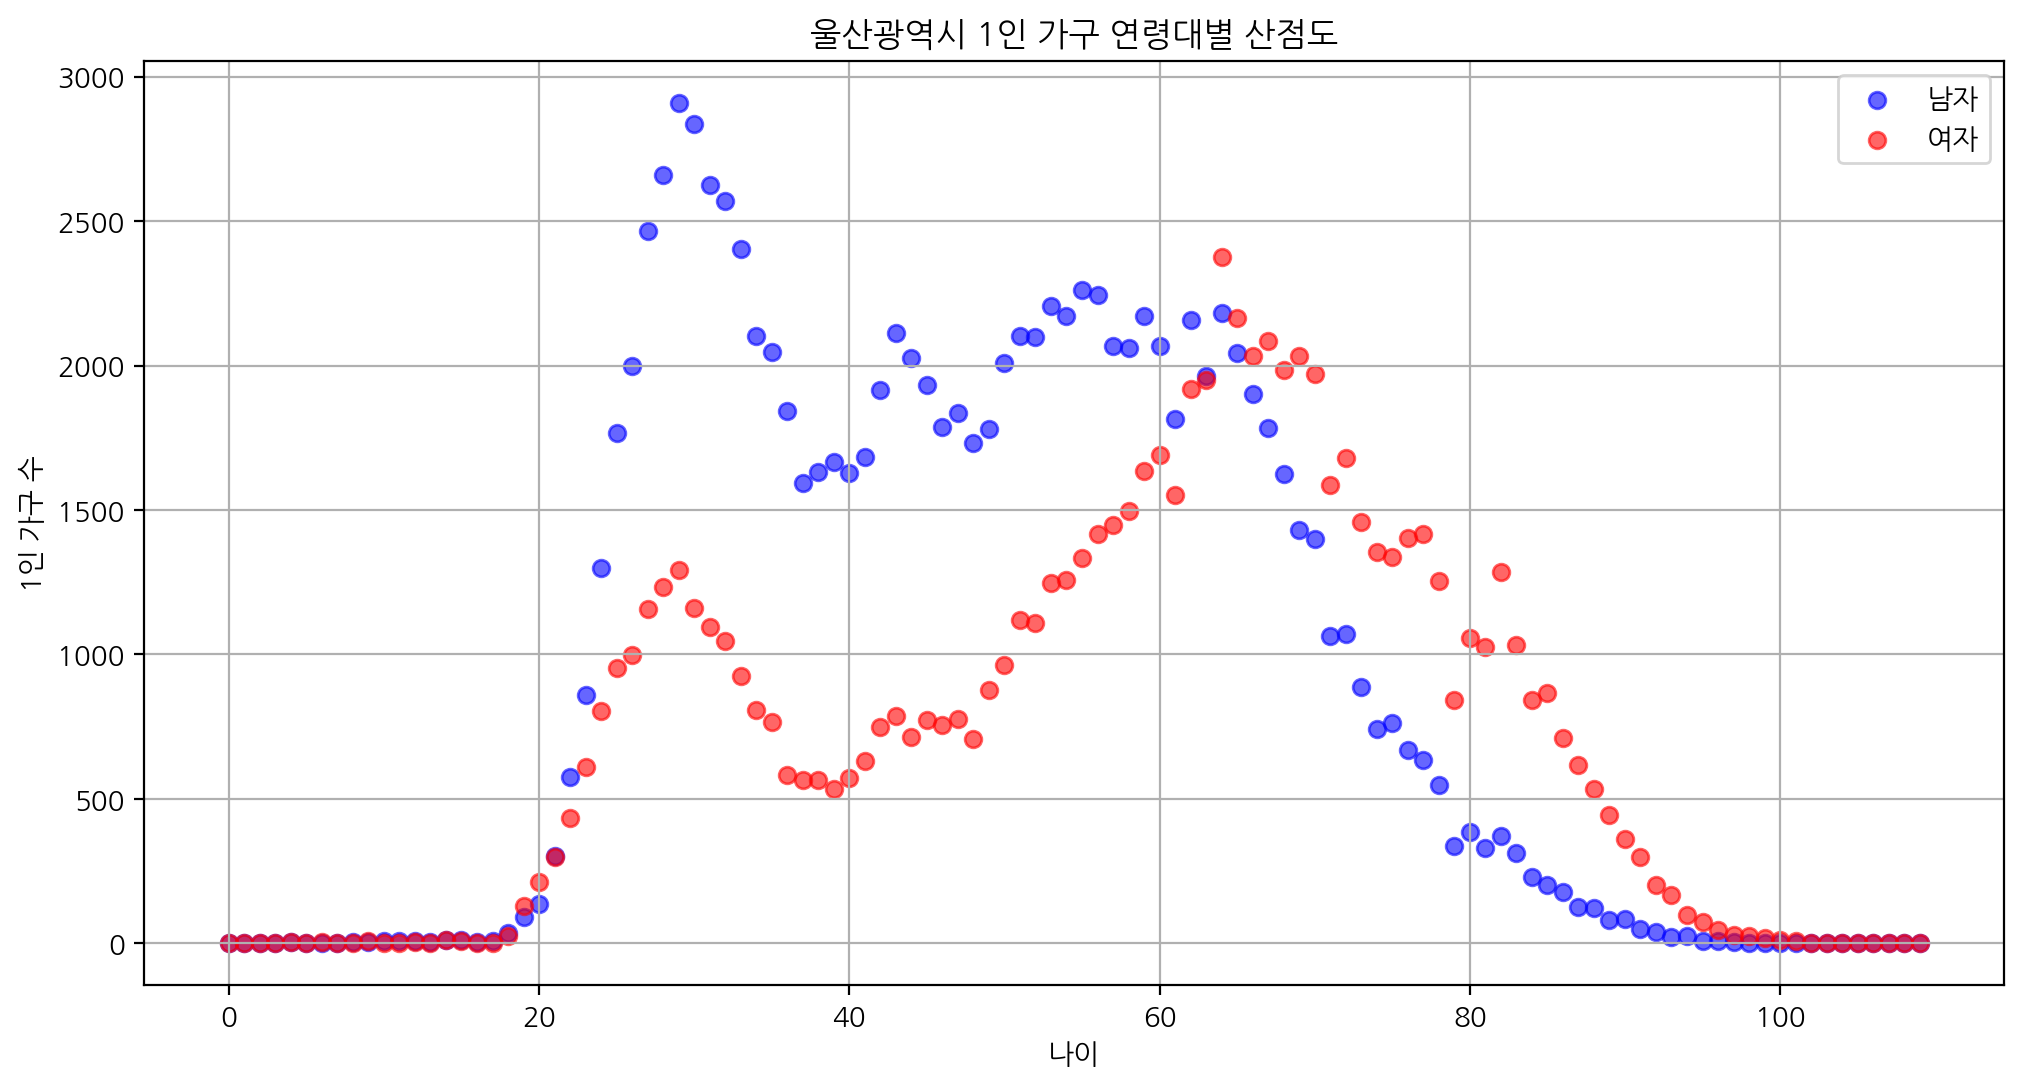

In [37]:
# 울산광역시 필터링
ulsan = df[df["시도명"] == "울산광역시"]

# 연령 관련 열 분리
male_columns = [col for col in ulsan.columns if "세" in col and "남자" in col]
female_columns = [col for col in ulsan.columns if "세" in col and "여자" in col]

# 남자 데이터
male_ages = []
male_totals = []
for col in male_columns:
    try:
        age = int(col.replace("세남자", ""))
        total = ulsan[col].sum()
        male_ages.append(age)
        male_totals.append(total)
    except:
        continue

# 여자 데이터
female_ages = []
female_totals = []
for col in female_columns:
    try:
        age = int(col.replace("세여자", ""))
        total = ulsan[col].sum()
        female_ages.append(age)
        female_totals.append(total)
    except:
        continue

# 시각화
plt.figure(figsize=(12, 6))
plt.scatter(male_ages, male_totals, color='blue', alpha=0.6, label='남자')
plt.scatter(female_ages, female_totals, color='red', alpha=0.6, label='여자')
plt.title("울산광역시 1인 가구 연령대별 산점도")
plt.xlabel("나이")
plt.ylabel("1인 가구 수")
plt.legend()
plt.grid(True)
plt.show()

-> 울산광역시 1인 가구 연령대별 산점도

x축은 연령대, y축은 가구 수다

남자의 경우 30대 초반 1인 가구 수가 제일 높았고 여자의 경우 60대 초반 1인 가구 수가 제일 높다

In [52]:
print(gender_by_region.loc["광주광역시", ["남자비율", "여자비율"]].round(3))

남자비율    0.502
여자비율    0.498
Name: 광주광역시, dtype: float64


-> 광주광역시의 1인 가구 성별 비율

남자가 여자보다 0.004% 많다

In [53]:
print(gender_by_region.loc["광주광역시", ["계", "남자", "여자"]])

계     276695.0
남자    138830.0
여자    137865.0
Name: 광주광역시, dtype: float64


-> 광주광역시의 총 1인 가구 수 (총 수, 남자 수, 여자 수)

In [55]:
# 광주광역시 데이터만 필터링
gwangju = df[df["시도명"] == "광주광역시"]

# 계 기준으로 내림차순 정렬하고 가장 많은 행 3개 출력
top_gwangju = gwangju.sort_values(by="계", ascending=False)[["시군구명", "읍면동명", "계"]].head(3)

print("✅ 광주광역시에서 1인 가구 수가 가장 많은 지역:")
print(top_gwangju)

✅ 광주광역시에서 1인 가구 수가 가장 많은 지역:
     시군구명  읍면동명     계
997    북구   용봉동  8531
1032  광산구   수완동  8162
1029  광산구  첨단2동  8149


-> 광주광역시에서 1인 가구 수가 가장 많은 지역 top 3


1위는 북구 용봉동 총 8531명

2위는 광산구 수완동 총 8162명

3위는 광산구 첨단2동 총 8149명

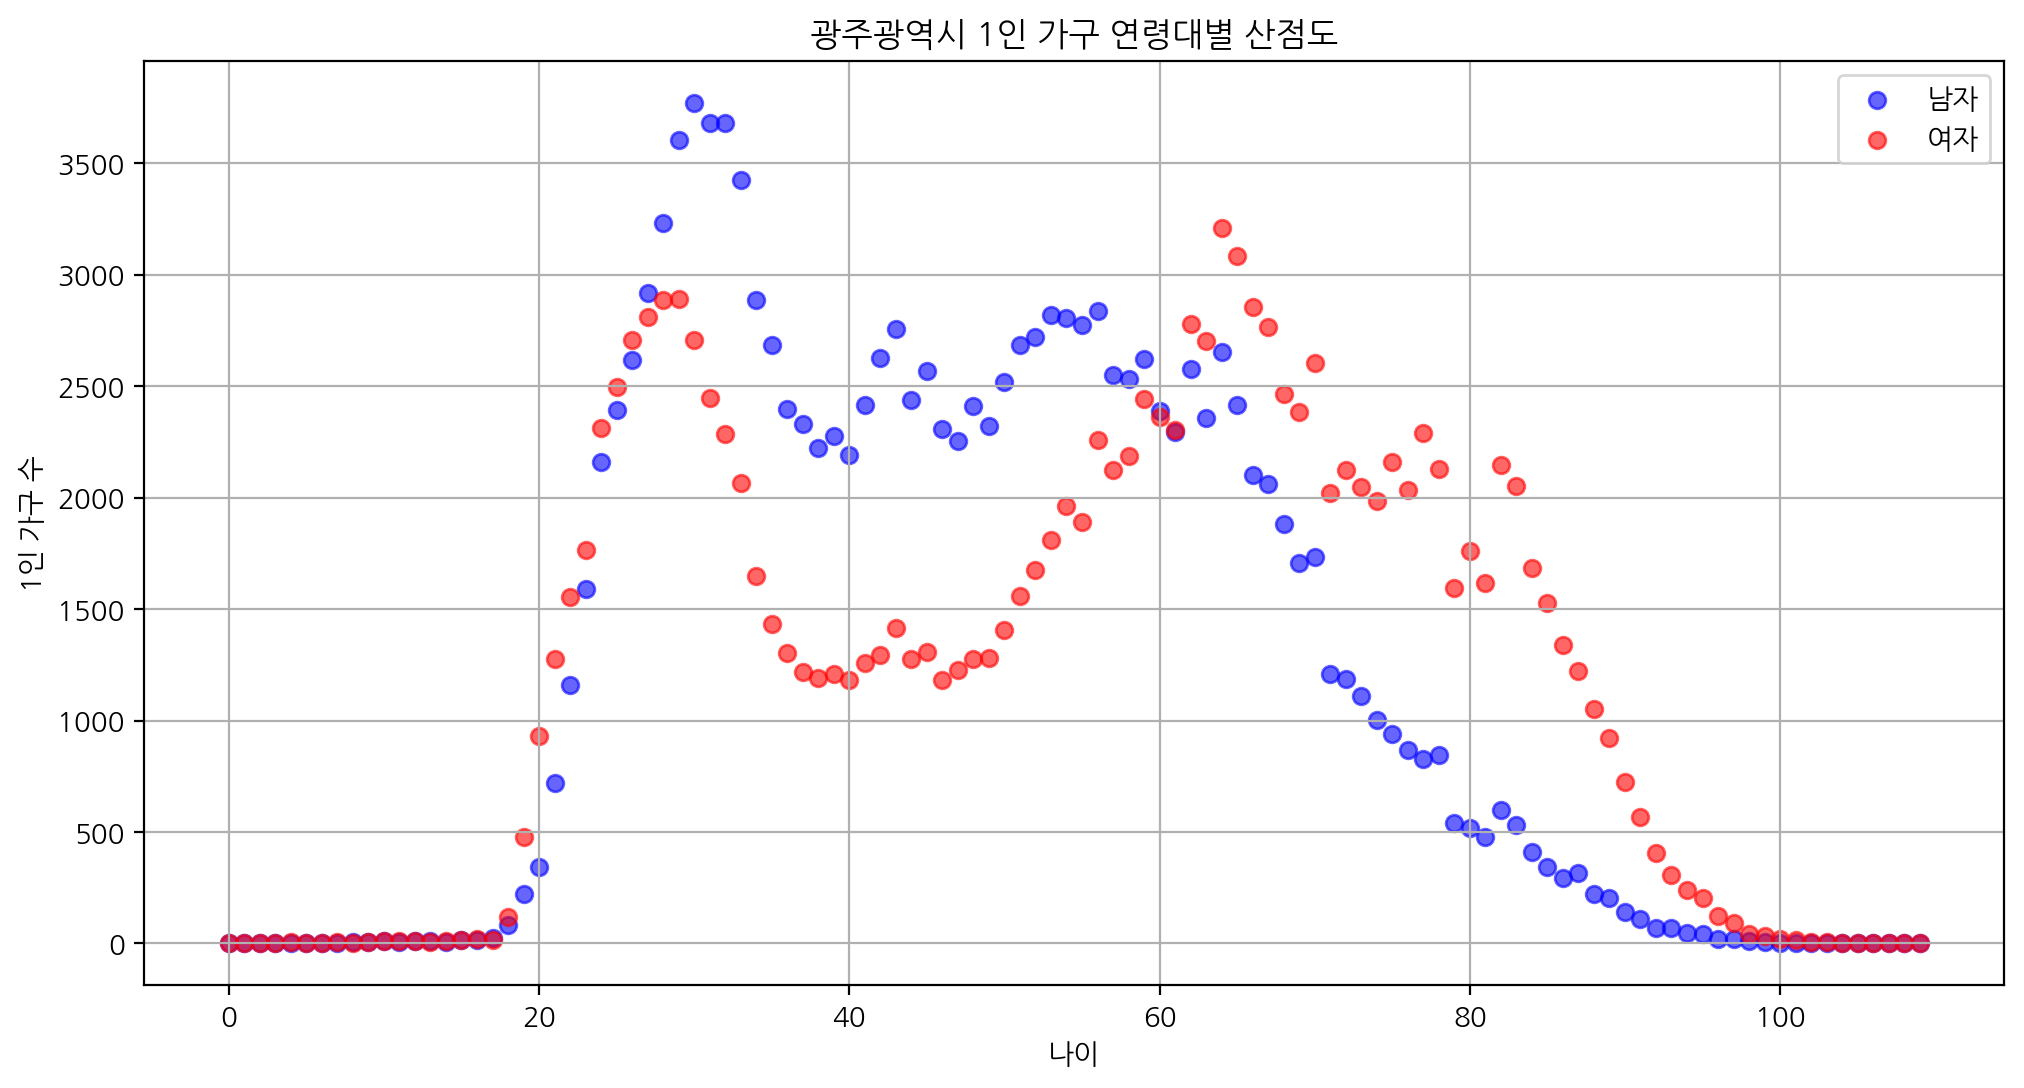

In [56]:
# 광주광역시 필터링
gwangju = df[df["시도명"] == "광주광역시"]

# 연령 관련 열 분리
male_columns = [col for col in gwangju.columns if "세" in col and "남자" in col]
female_columns = [col for col in gwangju.columns if "세" in col and "여자" in col]

# 남자 데이터
male_ages = []
male_totals = []
for col in male_columns:
    try:
        age = int(col.replace("세남자", ""))
        total = gwangju[col].sum()
        male_ages.append(age)
        male_totals.append(total)
    except:
        continue

# 여자 데이터
female_ages = []
female_totals = []
for col in female_columns:
    try:
        age = int(col.replace("세여자", ""))
        total = gwangju[col].sum()
        female_ages.append(age)
        female_totals.append(total)
    except:
        continue

# 시각화
plt.figure(figsize=(12, 6))
plt.scatter(male_ages, male_totals, color='blue', alpha=0.6, label='남자')
plt.scatter(female_ages, female_totals, color='red', alpha=0.6, label='여자')
plt.title("광주광역시 1인 가구 연령대별 산점도")
plt.xlabel("나이")
plt.ylabel("1인 가구 수")
plt.legend()
plt.grid(True)
plt.show()

-> 광주광역시 1인 가구 연령대별 산점도

x축은 연령대, y축은 가구 수다

남자의 경우 30대 1인 가구 수가 제일 높았고 여자의 경우 60대 초반 1인 가구 수가 제일 높다